In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
train_users = pd.read_csv("yelp_user.csv")
train_tips = pd.read_csv("yelp_tip.csv")

In [40]:
train_users_combined = train_users.join(train_tips.set_index('user_id'), lsuffix='_user_id')

In [5]:
train_users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [6]:
train_users.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful',
       'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [16]:
non_elite_users = train_users.query('elite == "None"')
non_elite_users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [12]:
elite_users = train_users.query('elite != "None"')
elite_users.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,...,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",...,4,2,7,0,16,52,47,47,14,1
175,iWMxMUWNXfdvVl9oXSaltA,Tony,34,2011-08-14,"WKIW7tWyMq7_XN0V2ouo0A, yss1qD4e_7sPWUbuc_0SzA...",31,9,15,9,2017,...,0,0,0,0,4,5,8,8,7,10
246,i5jSTSpXJtvM-ExWRttglw,Evelina,85,2014-03-17,"aLvxbF2DueKFOqul9eVWCw, JesJ-LaNfr3pKhL7gWhDrw...",51,12,33,13,"2016, 2017, 2014, 2015",...,1,0,0,0,5,16,13,13,14,4
414,snDjs1hdh7JOWv4jjbXPDw,Michael,447,2008-11-19,"uIjj7EIVBU4kGNgmKPO02A, kroQYWSj-BhIEXT4VwLRHA...",35,36,7,13,"2015, 2013, 2014, 2017, 2016",...,3,2,0,0,11,25,22,22,17,3


3.7042837407


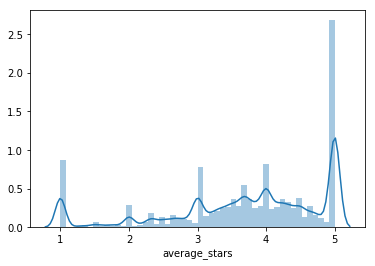

3.7042837407


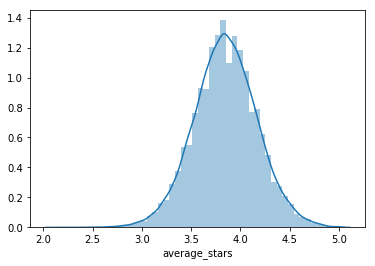

In [26]:
print(sum(non_elite_users['average_stars'])/len(non_elite_users))
sns.distplot(non_elite_users['average_stars'])
plt.show()

print(sum(non_elite_users['average_stars'])/len(non_elite_users))
sns.distplot(elite_users['average_stars'])
plt.show()

13.3231334991


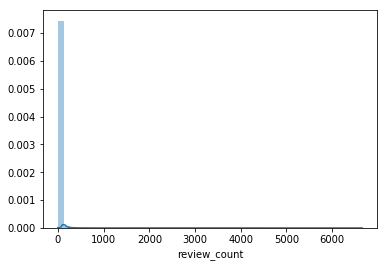

226.876286626


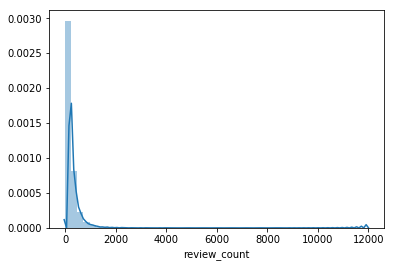

In [27]:
print(sum(non_elite_users['review_count'])/len(non_elite_users))
sns.distplot(non_elite_users['review_count'])
plt.show()

print(sum(elite_users['review_count'])/len(elite_users))
sns.distplot(elite_users['review_count'])
plt.show()

0.472813175245


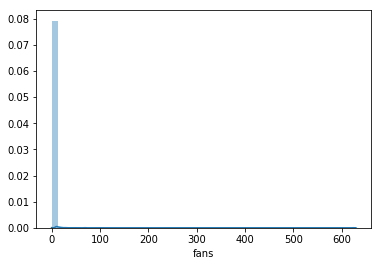

21.9383899503


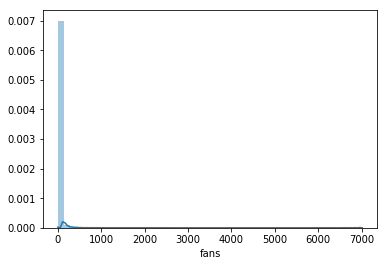

In [28]:
print(sum(non_elite_users['fans'])/len(non_elite_users))
sns.distplot(non_elite_users['fans'])
plt.show()

print(sum(elite_users['fans'])/len(elite_users))
sns.distplot(elite_users['fans'])
plt.show()

7.86705967523
0.0


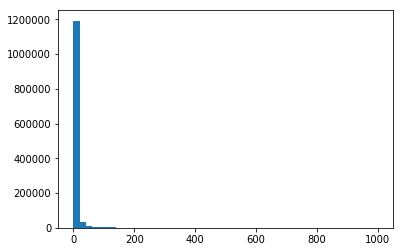

476.175589464
43.0


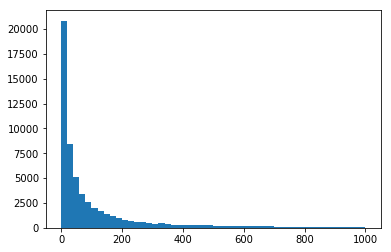

In [39]:
print(sum(non_elite_users['useful'])/len(non_elite_users))
print(np.median(non_elite_users['useful']))
plt.hist(non_elite_users['useful'], bins=50, range=(0, 1000))
plt.show()

print(sum(elite_users['useful'])/len(elite_users))
print(np.median(elite_users['useful']))
plt.hist(elite_users['useful'], bins=50, range=(0, 1000))
plt.show()